Scatter Plot Game

Enter grid size: 6
Enter your X guess (0 to 5): 3
Enter your Y guess (0 to 5): 4


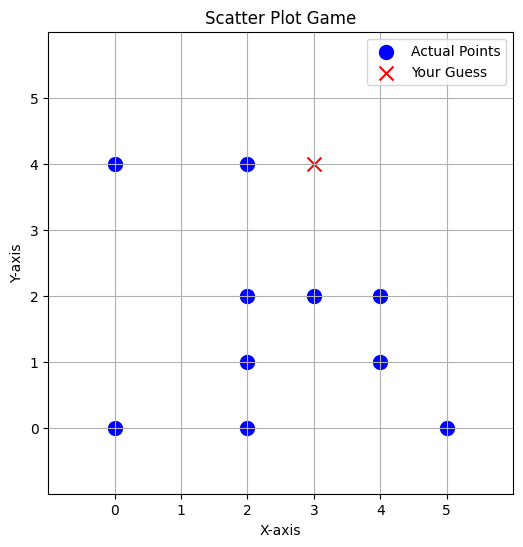

Do you want to play again? (yes/no): no
Thanks for playing!


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random

def initialize_grid(grid_size):
    # Initialize a grid with a given size and place 10 random points.
    grid = np.zeros((grid_size, grid_size))
    for _ in range(10):
        x = random.randint(0, grid_size - 1)
        y = random.randint(0, grid_size - 1)
        grid[x, y] = 1
    return grid

def get_user_guess(grid_size):
    # Get x and y coordinates from the user.
    x_guess = int(input(f"Enter your X guess (0 to {grid_size - 1}): "))
    y_guess = int(input(f"Enter your Y guess (0 to {grid_size - 1}): "))
    return x_guess, y_guess

def plot_results(grid, user_guess):
    # Plot the grid and the user's guess.
    x_actual, y_actual = np.where(grid == 1)

    plt.figure(figsize=(6, 6))
    plt.scatter(x_actual, y_actual, c='blue', label='Actual Points', s=100)
    plt.scatter(user_guess[0], user_guess[1], c='red', label='Your Guess', s=100, marker='x')

    plt.xlim(-1, len(grid))
    plt.ylim(-1, len(grid))
    plt.xticks(range(len(grid)))
    plt.yticks(range(len(grid)))
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Scatter Plot Game")
    plt.grid(True)
    plt.legend()
    plt.show()

def scatter_plot_game():
    # Main function to run the scatter plot game.
    grid_size = int(input("Enter grid size: "))

    while True:
        grid = initialize_grid(grid_size)
        user_guess = get_user_guess(grid_size)
        plot_results(grid, user_guess)

        play_again = input("Do you want to play again? (yes/no): ").strip().lower()
        if play_again != 'yes':
            print("Thanks for playing!")
            break

scatter_plot_game()


Algebra Practice Game

In [4]:
import random

def generate_one_step_problem(number_range):
    # Generate a one-step algebra problem of the form ax = b
    a = random.randint(-number_range, number_range)
    b = random.randint(-number_range, number_range)
    # Ensure 'a' is not zero to avoid division by zero
    while a == 0:
        a = random.randint(-number_range, number_range)
    # The correct answer for x
    correct_answer = b / a
    return f"{a}x = {b}", correct_answer

def generate_two_step_problem(number_range):
    # Generate a two-step algebra problem of the form ax + c = b or ax - c = b
    a = random.randint(-number_range, number_range)
    b = random.randint(-number_range, number_range)
    c = random.randint(-number_range, number_range)
    # Ensure 'a' is not zero to avoid division by zero
    while a == 0:
        a = random.randint(-number_range, number_range)

    # Randomly decide whether to add or subtract c
    if random.choice([True, False]):
        problem = f"{a}x + {c} = {b}"
        correct_answer = (b - c) / a
    else:
        problem = f"{a}x - {c} = {b}"
        correct_answer = (b + c) / a

    return problem, correct_answer

def algebra_practice_game():
    number_range = 6  # You can change this value to adjust the difficulty of the problems
    correct_count = 0
    total_count = 0

    while True:
        problem_type = random.choice(['one-step', 'two-step'])

        if problem_type == 'one-step':
            problem, correct_answer = generate_one_step_problem(number_range)
        else:
            problem, correct_answer = generate_two_step_problem(number_range)

        print(f"Solve for x: {problem}")
        user_answer = input("Your answer: ")

        try:
            user_answer = float(user_answer)
            if abs(user_answer - correct_answer) < 0.01:  # Allowing for small floating-point errors
                print("Correct!")
                correct_count += 1
            else:
                print(f"Incorrect! The correct answer was {correct_answer:.2f}")
        except ValueError:
            print("Invalid input. Please enter a number.")

        total_count += 1

        play_again = input("Do you want to solve another problem? (yes/no): ").strip().lower()
        if play_again != 'yes':
            break

    print(f"\nGame Over! You solved {correct_count} out of {total_count} problems correctly.")

algebra_practice_game()


Solve for x: -2x = 1
Your answer: -0.5
Correct!
Do you want to solve another problem? (yes/no): no

Game Over! You solved 1 out of 1 problems correctly.


Projectile Game

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Text, Dropdown, Button, VBox, HBox, Output
import random
from IPython.display import display, clear_output

# Generate random wall properties
def generate_wall():
    x_pos = random.uniform(2, 8)  # Random x position of the wall
    height = random.uniform(1, 5)  # Random height of the wall
    return x_pos, height

# Function to compute the parabolic path
def parabolic_path(x, a, b, c):
    return a * x**2 + b * x + c

# Function to plot the game scene
def plot_game(a, b, c, wall_x, wall_height, output):
    with output:
        clear_output(wait=True)
        x_vals = np.linspace(0, 10, 400)
        y_vals = parabolic_path(x_vals, a, b, c)

        # Plotting the parabolic path
        plt.figure(figsize=(10, 6))
        plt.plot(x_vals, y_vals, label=f'Path: y = {a}x^2 + {b}x + {c}')

        # Plotting the wall
        plt.plot([wall_x, wall_x], [0, wall_height], color='red', linewidth=5, label='Wall')
        plt.fill_between([wall_x-0.1, wall_x+0.1], 0, wall_height, color='red', alpha=0.5)

        # Limits and labels
        plt.xlim(0, 10)
        plt.ylim(0, max(y_vals) + 1)
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.title("Adjust the Parameters to Clear the Wall")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.legend()
        plt.show()

        # Check if the path clears the wall
        y_at_wall = parabolic_path(wall_x, a, b, c)
        if y_at_wall > wall_height:
            print("Success! The projectile clears the wall.")
        else:
            print("Fail! The projectile does not clear the wall.")

# Function to handle difficulty selection
def start_game(difficulty):
    clear_output()
    wall_x, wall_height = generate_wall()
    output = Output()

    if difficulty == 'Easy':
        # Easy mode with sliders
        a_slider = FloatSlider(min=-1.0, max=1.0, step=0.01, value=0.1, description='a')
        b_slider = FloatSlider(min=-5.0, max=5.0, step=0.1, value=1.0, description='b')
        c_slider = FloatSlider(min=0.0, max=10.0, step=0.1, value=1.0, description='c')

        def update_plot(a, b, c):
            plot_game(a, b, c, wall_x, wall_height, output)

        interact(update_plot, a=a_slider, b=b_slider, c=c_slider)

    elif difficulty == 'Hard':
        # Hard mode with text inputs
        a_input = Text(value='0.1', description='a:')
        b_input = Text(value='2.0', description='b:')
        c_input = Text(value='1.0', description='c:')

        def on_submit(_):
            a = float(a_input.value)
            b = float(b_input.value)
            c = float(c_input.value)
            plot_game(a, b, c, wall_x, wall_height, output)

        submit_button = Button(description="Submit")
        submit_button.on_click(on_submit)

        display(VBox([a_input, b_input, c_input, submit_button]))

    display(output)

# Dropdown to choose difficulty
difficulty_dropdown = Dropdown(
    options=['Easy', 'Hard'],
    value='Easy',
    description='Difficulty:',
)

start_button = Button(description="Start Game")

def on_start_button_clicked(button):
    start_game(difficulty_dropdown.value)

start_button.on_click(on_start_button_clicked)

# Display the dropdown and start button
display(VBox([difficulty_dropdown, start_button]))


Output()